# Exploratory Data Analysis

In [71]:
# Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# preprocessing functions in the preproc module
import sys
sys.path.append('../')
from src import preprocfunctions

from IPython.display import display, HTML
import json
import warnings
warnings.filterwarnings('ignore')

display(HTML(data="""
<style>
    div#notebook-container    { width: 85%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [72]:
# Importing the dataset
df_train = pd.read_csv("../input/Webpages_Classification_train_data.csv")
df_train.drop(columns = "Unnamed: 0", inplace = True)

# ISO code dataset
count = pd.read_csv('../input/tableconvert_csv_pkcsig.csv')

In [73]:
df_train.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.0,Named themselves charged particles in a manly ...,good
1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good
2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good
3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.8,fire cumshot sodomize footaction tortur failed...,bad
4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good


In [74]:
count.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


In [75]:
print ("The shape of the dataset : ", df_train.shape)

The shape of the dataset :  (1200000, 11)


In [76]:
# Adding a Feature that is the ISO_ALPHA_3 codes of the countries
countries = dict(zip(count['Country'], count['Alpha-3 code']))

df_train['iso_3'] = df_train['geo_loc']
df_train['iso_3'].replace(countries, inplace = True)
df_train.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label,iso_3
0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.0,Named themselves charged particles in a manly ...,good,TWN
1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good,USA
2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good,ARG
3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.8,fire cumshot sodomize footaction tortur failed...,bad,USA
4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good,USA


In [77]:
# Doing some preprocessing before EDA
df_train.https.replace({'yes' : 'HTTPS', 'no' : 'HTTP'}, inplace = True)
df_train.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label,iso_3
0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,HTTPS,58.0,0.0,Named themselves charged particles in a manly ...,good,TWN
1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,HTTPS,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good,USA
2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,HTTPS,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good,ARG
3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,HTTP,720.0,532.8,fire cumshot sodomize footaction tortur failed...,bad,USA
4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,HTTPS,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good,USA


In [78]:
# Adding Feature that shows the Network type
df_train['Network']= df_train['ip_add'].apply(lambda x : preprocfunctions.network_type(x))
df_train['net_part'], df_train['net_type'] = zip(*df_train.Network)
df_train.drop(columns = ['Network'], inplace = True)

# Adding Feature that shows the Number of Special Character in the Content
df_train['special_char'] = df_train['content'].apply(lambda x: preprocfunctions.count_special(x))

In [79]:
# Length of the Content
df_train['content_len'] = df_train['content'].apply(lambda x: len(x))

In [80]:
df_train.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label,iso_3,net_part,net_type,special_char,content_len
0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,HTTPS,58.0,0.0,Named themselves charged particles in a manly ...,good,TWN,42,A,74,1155
1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,HTTPS,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good,USA,3,A,51,611
2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,HTTPS,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good,ARG,24,A,109,1320
3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,HTTP,720.0,532.8,fire cumshot sodomize footaction tortur failed...,bad,USA,147.22,B,718,8946
4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,HTTPS,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good,USA,205.30.239,C,58,722


### Distribution of Webpage types

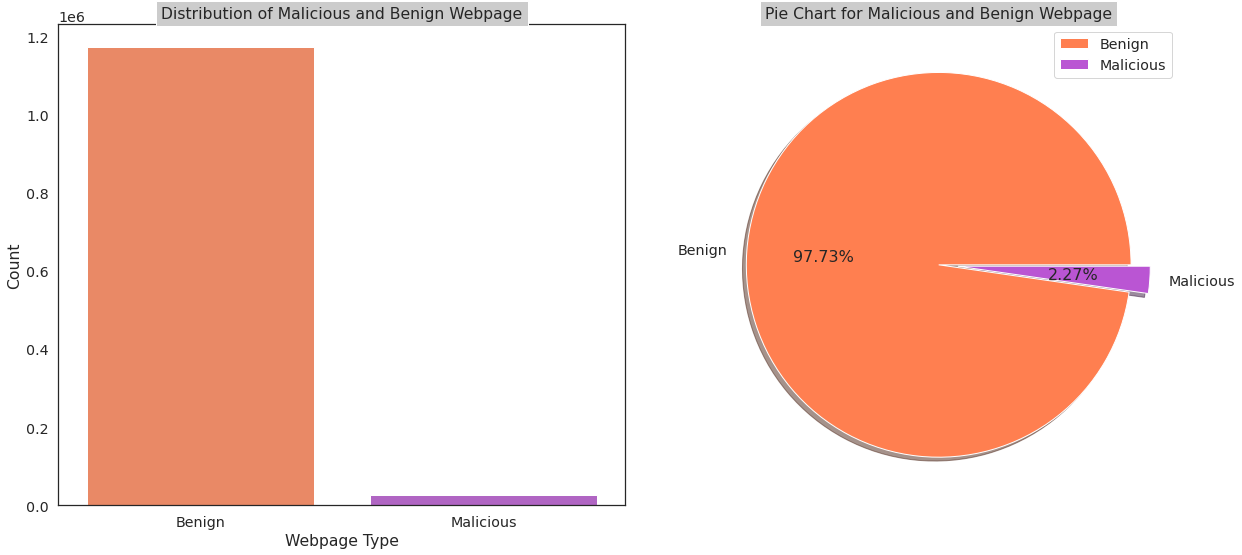

In [81]:
plt.rcParams['figure.figsize'] = [18, 8]
sns.set(style = 'white', font_scale = 1.3)
fig, ax = plt.subplots(1, 2)

df_train.label.replace({'bad' : 'Malicious', 'good' : 'Benign'}, inplace = True)
bar = sns.countplot(df_train.label, data = df_train, ax = ax[0], palette = ['coral', 'mediumorchid'])
bar.set(xlabel = 'Webpage Type', ylabel = 'Count')
bar.set_title("Distribution of Malicious and Benign Webpage", bbox={'facecolor':'0.8', 'pad':5})

# Creating the labels for the piechart
types = df_train['label'].value_counts()
labels = list(types.index)
aggregate = list(types.values)
# percentage = [(x*100)/sum(aggregate) for x in aggregate]
# print ("The percentages of Benign and Malicious Webpages are : ", percentage)

# Plotting the Piechart to see the percentage distribution of the Webpages
plt.rcParams.update({'font.size': 16})
explode = (0, 0.1)
ax[1].pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True, explode = explode, colors = ['coral', 'mediumorchid'])
plt.title("Pie Chart for Malicious and Benign Webpage", bbox={'facecolor':'0.8', 'pad':5})
plt.legend(labels, loc = 'best')
plt.tight_layout()
plt.show()

### Choropleth Map showing the Malicious Webpages

In [82]:
df = df_train.loc[df_train.label == 'Malicious', :]

val = df.iso_3.value_counts()
val = pd.DataFrame(val)
val

,iso_3
USA,11678
CHN,2661
JPN,1579
DEU,979
KOR,823
...,...
CUB,1
LIE,1
MCO,1
SOM,1


In [83]:
# Choropleth Map
fig = go.Figure(data = go.Choropleth(
    locations = val.index,
    z = val.iso_3,
#     text = val.index,
    colorscale = 'reds',
    autocolorscale = False,
    reversescale = False,
    marker_line_color = 'darkgray',
    marker_line_width = 0.5,
    colorbar_title = 'Number of Webpages',
))

fig.update_layout(
    title_text = 'Malicious Webpages Around the World',
    geo = dict(
        showframe = False,
        showcoastlines = False,
#         projection_type = 'equirectangular'
    ),
    annotations = [dict(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="https://data.mendeley.com/datasets/gdx3pkwp47/2">\
            Dataset [Mendeley Data] </a>',
        showarrow = False
    )]
)

fig.show()

### Choropleth Map showing the Benign Webpages

In [84]:
df = df_train.loc[df_train.label == 'Benign', :]

val = df.iso_3.value_counts()
val = pd.DataFrame(val)
val

,iso_3
USA,501718
CHN,110998
JPN,67207
DEU,41142
GBR,37052
...,...
KIR,1
IOT,1
GNB,1
NIU,1


In [85]:
# Choropleth Map
fig = go.Figure(data = go.Choropleth(
    locations = val.index,
    z = val.iso_3,
#     text = val.index,
    colorscale = 'blues',
    autocolorscale = False,
    reversescale = False,
    marker_line_color = 'darkgray',
    marker_line_width = 0.5,
    colorbar_title = 'Number of Webpages',
))

fig.update_layout(
    title_text = 'Benign Webpages Around the World',
    geo = dict(
        showframe = False,
        showcoastlines = False,
#         projection_type = 'equirectangular'
    ),
    annotations = [dict(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="https://data.mendeley.com/datasets/gdx3pkwp47/2">\
            Dataset [Mendeley Data] </a>',
        showarrow = False
    )]
)

fig.show()

### URL Length (url_len) Distribution

In [86]:
df_mal = df_train.loc[df_train.label == 'Malicious', :]
df_ben = df_train.loc[df_train.label == 'Benign', :]

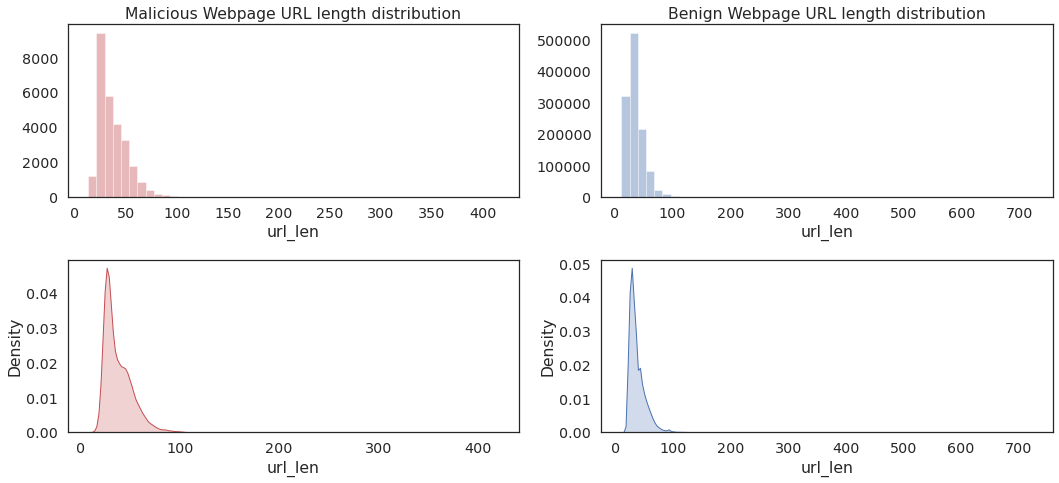

In [87]:
plt.rcParams['figure.figsize'] = [15, 7]

fig, ax = plt.subplots(2, 2)

mal = sns.distplot(df_mal['url_len'], color = 'r', hist = True, rug = False, kde = False, ax = ax[0,0])
mal.set(title = 'Malicious Webpage URL length distribution')
ben = sns.distplot(df_ben['url_len'], color = 'b', hist = True, rug = False, kde = False, ax = ax[0,1])
ben.set(title = 'Benign Webpage URL length distribution')

sns.kdeplot(df_mal['url_len'], color = 'r', fill = True, ax = ax[1,0])
sns.kdeplot(df_ben['url_len'], color = 'b', fill = True, ax = ax[1,1])

plt.tight_layout()
plt.show()

### Bar graph showing the most used TLD in URLs over Malicious and Benign Webpages

In [88]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

mal_tld = pd.DataFrame(df_mal.tld.value_counts()[:10])
ben_tld = pd.DataFrame(df_ben.tld.value_counts()[:10])

mal = go.Bar(y = mal_tld.tld, x = mal_tld.index.tolist(), text = mal_tld.tld, marker_color = 'indianred')
ben = go.Bar(y = ben_tld.tld, x = ben_tld.index.tolist(), text = ben_tld.tld, marker_color = 'lightsalmon')

fig = make_subplots(
    rows = 2, cols = 1, subplot_titles = ("Most occuring Top Level Domain in Malicious Webpages", "Most occuring Top Level Domain in Benign Webpages"),
    specs = [[{'type' : 'bar'}], [{'type' : 'bar'}]]
)

fig.append_trace(mal, row = 1, col = 1)
fig.append_trace(ben, row = 2, col = 1)
fig.update_traces(texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(uniformtext_minsize = 10, uniformtext_mode = 'hide', width = 1200, height = 900)

fig.show()

### Content Length Distribution over Malicious and Benign Webpages

Mean Content Length of Malicious Webpage :  6926.395993101677
Mean Content Length of Benign Webpage    :  1519.0496117235857



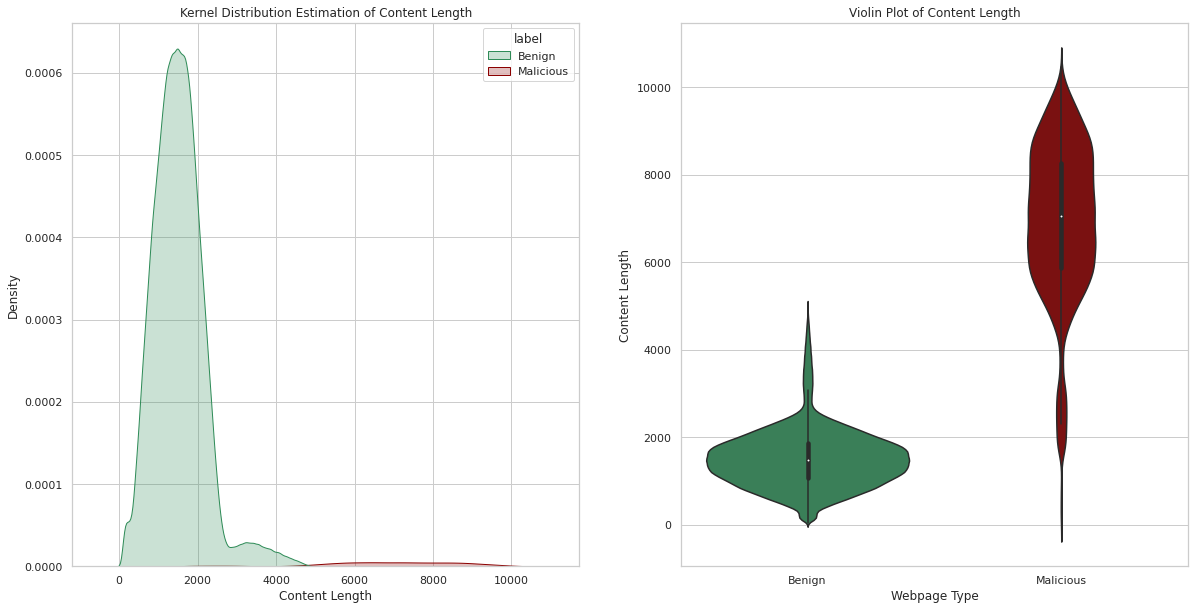

In [89]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = 'whitegrid')

fig, ax = plt.subplots(1, 2)
kde = sns.kdeplot(df_train.content_len, data = df_train, hue = 'label', vertical = False, fill = True, palette = ['seagreen', 'darkred'], ax = ax[0])
kde.set(title = 'Kernel Distribution Estimation of Content Length', xlabel = 'Content Length')

vio = sns.violinplot(y = df_train.content_len, x = df_train.label, data = df_train, palette = ['seagreen', 'darkred'], ax = ax[1])
vio.set(title = 'Violin Plot of Content Length', ylabel = 'Content Length', xlabel = 'Webpage Type')

print ("Mean Content Length of Malicious Webpage : ", df_train.loc[df_train.label == 'Malicious', 'content_len'].mean())
print ("Mean Content Length of Benign Webpage    : ", df_train.loc[df_train.label == 'Benign', 'content_len'].mean())
print ()

### js_len and js_obf_len Distribution over Malicious and Benign Webpages

<AxesSubplot:xlabel='js_obf_len', ylabel='Density'>

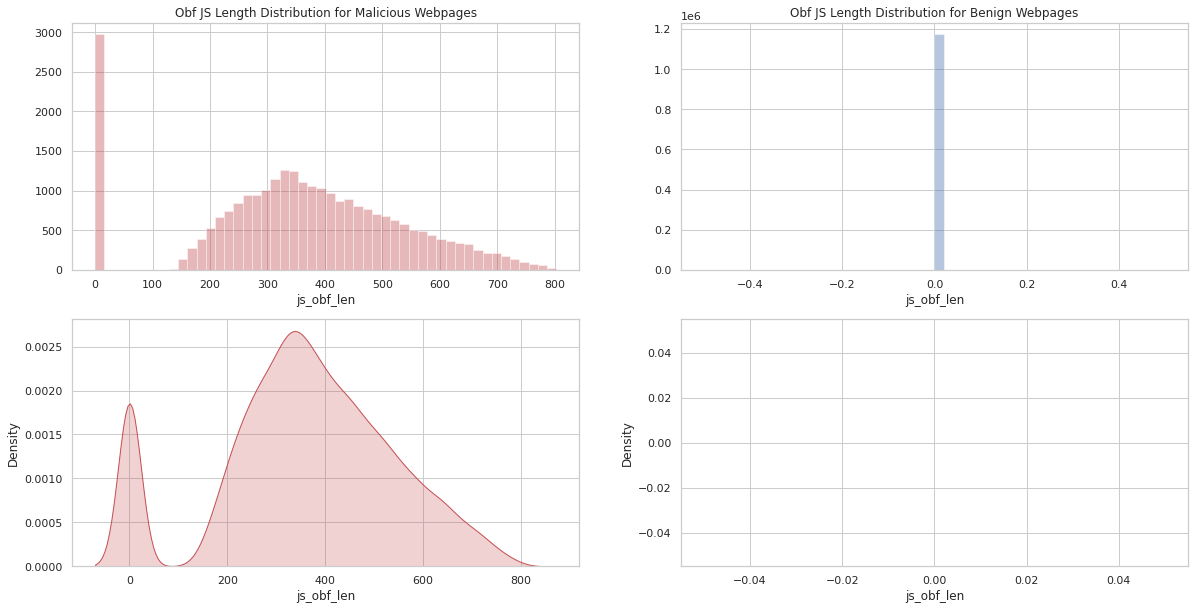

In [90]:
# js_obf_len
fig, ax = plt.subplots(2, 2)

mal = sns.distplot(df_mal.js_obf_len, hist = True, rug = False, kde = False, color = 'r', ax = ax[0,0])
mal.set(title = 'Obf JS Length Distribution for Malicious Webpages')
ben = sns.distplot(df_ben.js_obf_len, hist = True, rug = False, kde = False, color = 'b', ax = ax[0,1])
ben.set(title = 'Obf JS Length Distribution for Benign Webpages')

sns.kdeplot(df_mal.js_obf_len, data = df_train, fill = True, color = 'r', ax = ax[1,0])
sns.kdeplot(df_ben.js_obf_len, data = df_train, fill = True, color = 'b', ax = ax[1,1])

<AxesSubplot:xlabel='js_len', ylabel='Density'>

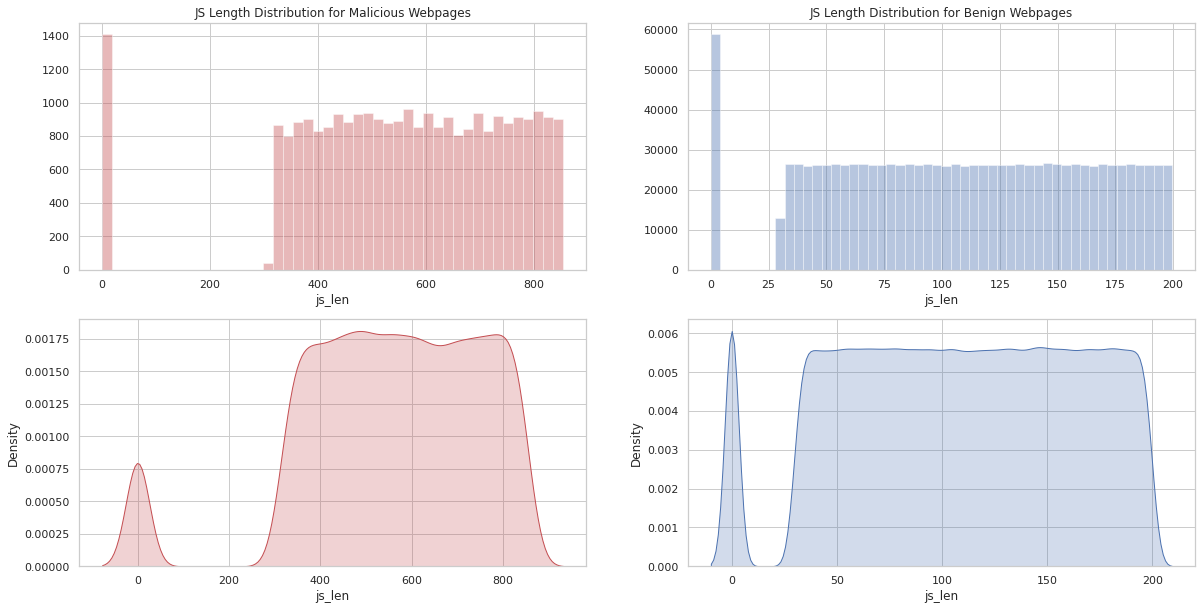

In [91]:
# js_len
fig, ax = plt.subplots(2, 2)

mal = sns.distplot(df_mal.js_len, hist = True, rug = False, kde = False, color = 'r', ax = ax[0,0])
mal.set(title = 'JS Length Distribution for Malicious Webpages')
ben = sns.distplot(df_ben.js_len, hist = True, rug = False, kde = False, color = 'b', ax = ax[0,1])
ben.set(title = 'JS Length Distribution for Benign Webpages')

sns.kdeplot(df_mal.js_len, data = df_train, fill = True, color = 'r', ax = ax[1,0])
sns.kdeplot(df_ben.js_len, data = df_train, fill = True, color = 'b', ax = ax[1,1])

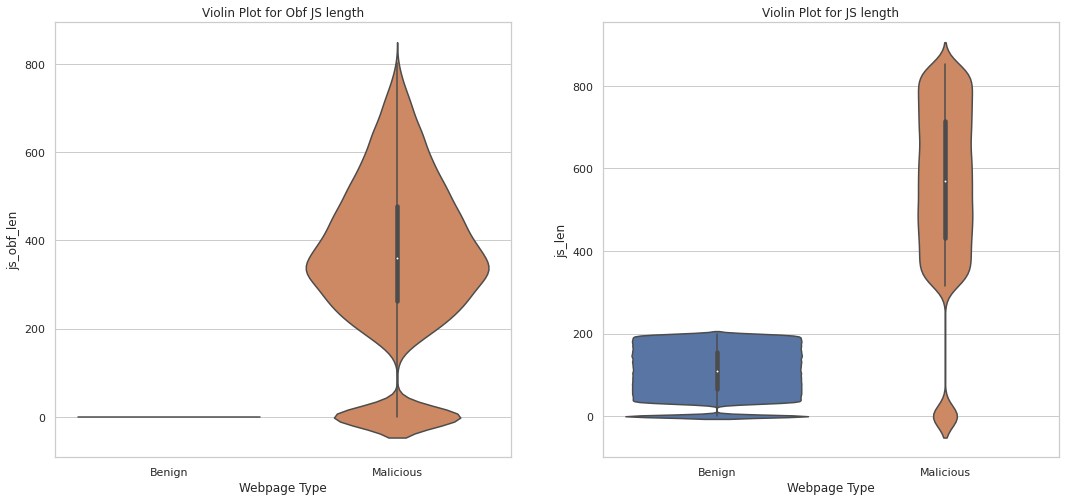

In [92]:
# Violin Plot showing the relation
plt.rcParams['figure.figsize'] = [18, 8]
fig, ax = plt.subplots(1, 2)

PAG = sns.violinplot(x = df_train.label, y = df_train.js_obf_len, data = df_train, ax = ax[0])
PAG.set(title = 'Violin Plot for Obf JS length', xlabel = 'Webpage Type')
PAG_ = sns.violinplot(x = df_train.label, y = df_train.js_len, data = df_train, ax = ax[1])
PAG_.set(title = 'Violin Plot for JS length', xlabel = 'Webpage Type');

### HTTPS and HTTP protocols distribution

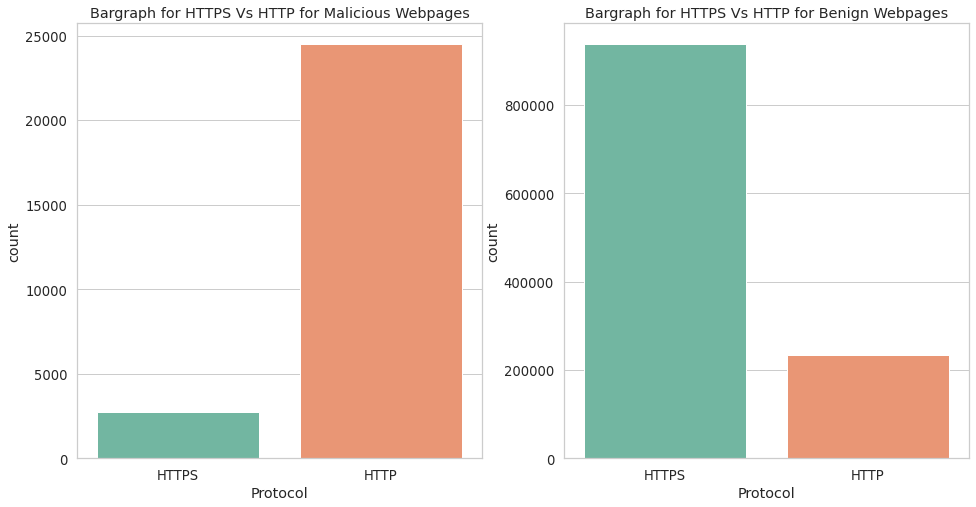

In [93]:
plt.rcParams['figure.figsize'] = [16, 8]
sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(1, 2)
bar_1 = sns.countplot(x = 'https', data = df_mal, order = ['HTTPS', 'HTTP'], palette = 'Set2', ax = ax[0])
bar_1.set(title = 'Bargraph for HTTPS Vs HTTP for Malicious Webpages', xlabel = 'Protocol')

bar_2 = sns.countplot(x = 'https', data = df_ben, order = ['HTTPS', 'HTTP'], palette = 'Set2', ax = ax[1])
bar_2.set(title = 'Bargraph for HTTPS Vs HTTP for Benign Webpages', xlabel = 'Protocol');

### Average Content length of the webpages around the world

In [94]:
con = pd.DataFrame(df_train.groupby('iso_3')['content_len'].mean())
con.head()

,content_len
iso_3,
ABW,1386.176471
AFG,1648.366197
AGO,1636.500000
AIA,1343.500000
ALB,1616.111111


In [95]:
# Choropleth Map
fig = px.choropleth(con, locations = con.index.tolist(),
                    color = "content_len",
                    color_continuous_scale = px.colors.sequential.Viridis)
fig.show()

### Network types over Malicious and Benign Webpages

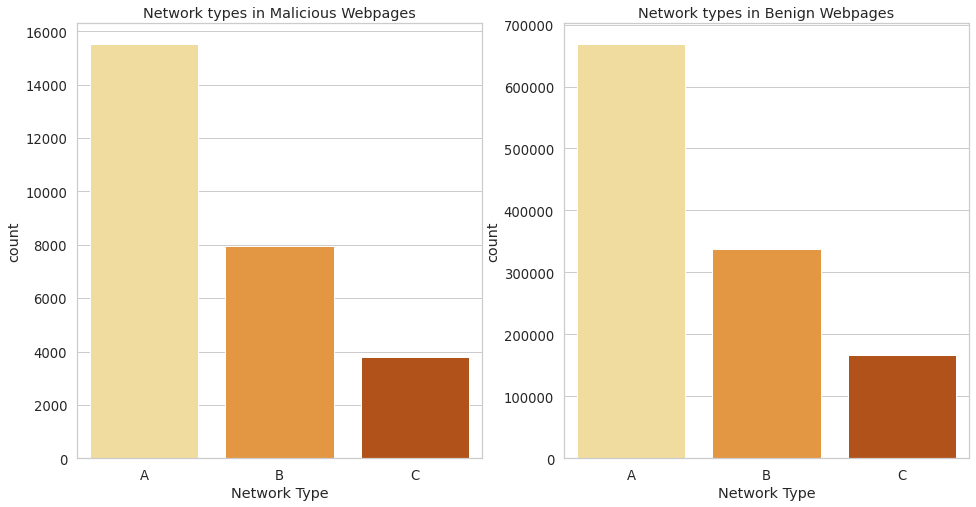

In [96]:
plt.rcParams['figure.figsize'] = [16, 8]
sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(1, 2)
bar_1 = sns.countplot(x = 'net_type', data = df_mal, order = ['A', 'B', 'C'], palette = 'YlOrBr', ax = ax[0])
bar_1.set(title = 'Network types in Malicious Webpages', xlabel = 'Network Type')

bar_2 = sns.countplot(x = 'net_type', data = df_ben, order = ['A', 'B', 'C'], palette = 'YlOrBr', ax = ax[1])
bar_2.set(title = 'Network types in Benign Webpages', xlabel = 'Network Type');

### Heatmap of Pearson Correlation

In [97]:
a = df_train.select_dtypes('object').columns.tolist()
ls = [element for element in a if element not in ['content', 'url', 'ip_add', 'label', 'net_part', 'iso_3']]
ls

['geo_loc', 'tld', 'who_is', 'https', 'net_type']

In [98]:
for feature in ls:
    le = LabelEncoder()
    df_train[feature] = le.fit_transform(df_train[feature])

df_train.label.replace({'Malicious' : 1, 'Benign' : 0}, inplace = True)
df_train.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label,iso_3,net_part,net_type,special_char,content_len
0,http://members.tripod.com/russiastation/,40,42.77.221.155,205,195,0,1,58.0,0.0,Named themselves charged particles in a manly ...,0,TWN,42,0,74,1155
1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,222,195,0,1,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,0,USA,3,0,51,611
2,http://www.naef-usa.com/,24,24.232.54.41,9,195,0,1,103.5,0.0,"Took in cognitivism, whose adherents argue for...",0,ARG,24,0,109,1320
3,http://www.ff-b2b.de/,21,147.22.38.45,222,282,1,0,720.0,532.8,fire cumshot sodomize footaction tortur failed...,1,USA,147.22,1,718,8946
4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,222,195,0,1,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",0,USA,205.30.239,2,58,722


In [99]:
df_fin = df_train[['url_len', 'iso_3', 'tld', 'who_is', 'https', 'js_len', 'js_obf_len', 'label', 'net_type', 'special_char', 'content_len']]
df_fin.head()

,url_len,iso_3,tld,who_is,https,js_len,js_obf_len,label,net_type,special_char,content_len
0,40,TWN,195,0,1,58.0,0.0,0,0,74,1155
1,32,USA,195,0,1,52.5,0.0,0,0,51,611
2,24,ARG,195,0,1,103.5,0.0,0,0,109,1320
3,21,USA,282,1,0,720.0,532.8,1,1,718,8946
4,35,USA,195,0,1,46.5,0.0,0,2,58,722


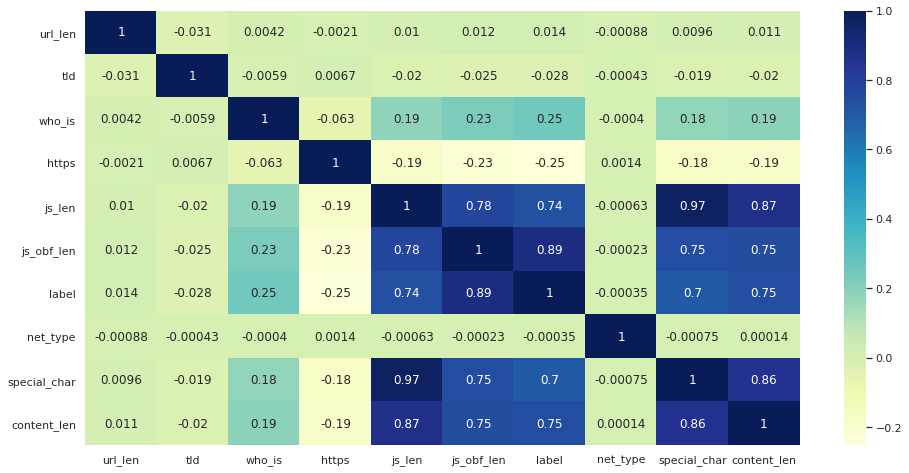

In [100]:
# Pearson Correlation Heatmap
plt.rcParams['figure.figsize'] == [18, 16]
sns.set(font_scale = 1)

sns.heatmap(df_fin.corr(method = 'pearson'), annot = True, cmap = "YlGnBu");